In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import hvplot
import matplotlib.pyplot as plt

In [3]:
# install geopandas
#pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/62/50/cc0cbc48d4f11899611edfb23a99d9d43101d3d28f2ef90a5506782cae84/fiona-1.9.5-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.8 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/30/bd/b9bd3761f08754e8dbb34c5a647db2099b348ab5da338e90980caf280e37/pyproj-3.6.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonhosted.org/packages/2c/b1/ca09649b4abe06366d41e90c3eee95a7741657404404a63bd0e8b53e32b8/shapely-2.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 

## Reading and Wrangling the data

In [2]:
import geopandas as gpd

In [77]:
# Raw polygon that can be used to plot the data
louisiana_Coast = gpd.read_file("/Users/georgechen/Downloads/LouisianaCoast_Geometry.geojson")
louisiana_Coast.head()

,id,regionID,geometry
0,0,LouisianaCoast,"POLYGON ((-92.37377 30.22781, -92.33530 30.151..."


In [78]:
# Raw VOD Data downloaded from Google Earth Engine
VOD_RAW = pd.read_csv("/Users/georgechen/Downloads/VOD_Time_Series.csv")
VOD_RAW.head(n=10)

,system:index,date,meanVOD,regionID,system:band_names,system:bands,.geo
0,1_vodca_v01-0_C-band_2006-01-01,2006-01-01,0.359056,PreFlood,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,1_vodca_v01-0_C-band_2006-01-02,2006-01-02,0.334890,PreFlood,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,1_vodca_v01-0_C-band_2006-01-03,2006-01-03,0.373916,PreFlood,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,1_vodca_v01-0_C-band_2006-01-04,2006-01-04,0.375457,PreFlood,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,1_vodca_v01-0_C-band_2006-01-05,2006-01-05,0.464026,PreFlood,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
5,1_vodca_v01-0_C-band_2006-01-06,2006-01-06,0.304787,PreFlood,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
6,1_vodca_v01-0_C-band_2006-01-07,2006-01-07,NaN,PreFlood,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
7,1_vodca_v01-0_C-band_2006-01-08,2006-01-08,0.373792,PreFlood,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
8,1_vodca_v01-0_C-band_2006-01-09,2006-01-09,0.364829,PreFlood,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
9,1_vodca_v01-0_C-band_2006-01-10,2006-01-10,0.381999,PreFlood,NaN,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [79]:
# Extract only the columns I want
VOD_RAW = VOD_RAW[['meanVOD', 'regionID', 'date']]
VOD_RAW['date'] = pd.to_datetime(VOD_RAW['date'])
VOD_RAW.set_index('date', inplace=True)

In [80]:
# Nice and Clean
VOD_RAW.sample(n=5)

,meanVOD,regionID
date,,
2006-07-13,0.483483,PreFlood
2013-01-28,0.384306,PostFlood
2013-08-24,0.576857,PostFlood
2013-01-26,NaN,PostFlood
2009-10-19,0.495299,PreFlood


### Discover missing VOD data

In [81]:
# Check for missing values
print(VOD_RAW.isnull().sum())

meanVOD     544
regionID      0
dtype: int64


### There area four ways I found to deal with the missing data

### # Option 1: Fill missing values by interpolation
 - VOD_RAW['meanVOD'] = VOD_RAW['meanVOD'].interpolate()
 - Using known data to fill the missing data
 - method = 'linear' is default one for equal time intervals
 - method = 'time' is especially for time series data
### # Option 2: Fill missing values with forward fill or backward fill
 - VOD_RAW['meanVOD'] = VOD_RAW['meanVOD'].fillna(method='ffill')  # Forward fill
 - VOD_RAW['meanVOD'] = VOD_RAW['meanVOD'].fillna(method='bfill')  # Backward fill

### # Option 3: Drop rows with missing values
 - VOD_RAW.dropna(inplace=True)

### # Option 4: Fill missing values with the mean or median
 - VOD_RAW['meanVOD'] = VOD_RAW['meanVOD'].fillna(data['meanVOD'].mean())
 - VOD_RAW['meanVOD'] = VOD_RAW['meanVOD'].fillna(data['meanVOD'].median())

In [82]:
VOD_RAW_timefill = VOD_RAW.copy()
VOD_RAW_timefill['meanVOD'] = VOD_RAW_timefill['meanVOD'].interpolate(method = 'time')
VOD_RAW_timefill.sample(n=5)

,meanVOD,regionID
date,,
2014-11-16,0.426104,PostFlood
2013-03-07,0.357273,PostFlood
2006-10-05,0.395059,PreFlood
2013-03-30,0.360140,PostFlood
2013-03-14,0.325600,PostFlood


In [87]:
preflood_raw = VOD_RAW.loc[VOD_RAW['regionID']=='PreFlood']
preflood_raw['regionID'].value_counts()
print(preflood_raw.isnull().sum())

meanVOD     205
regionID      0
dtype: int64


In [88]:
postflood_raw = VOD_RAW.loc[VOD_RAW['regionID']=='PostFlood']
postflood_raw['regionID'].value_counts()
print(postflood_raw.isnull().sum())

meanVOD     339
regionID      0
dtype: int64


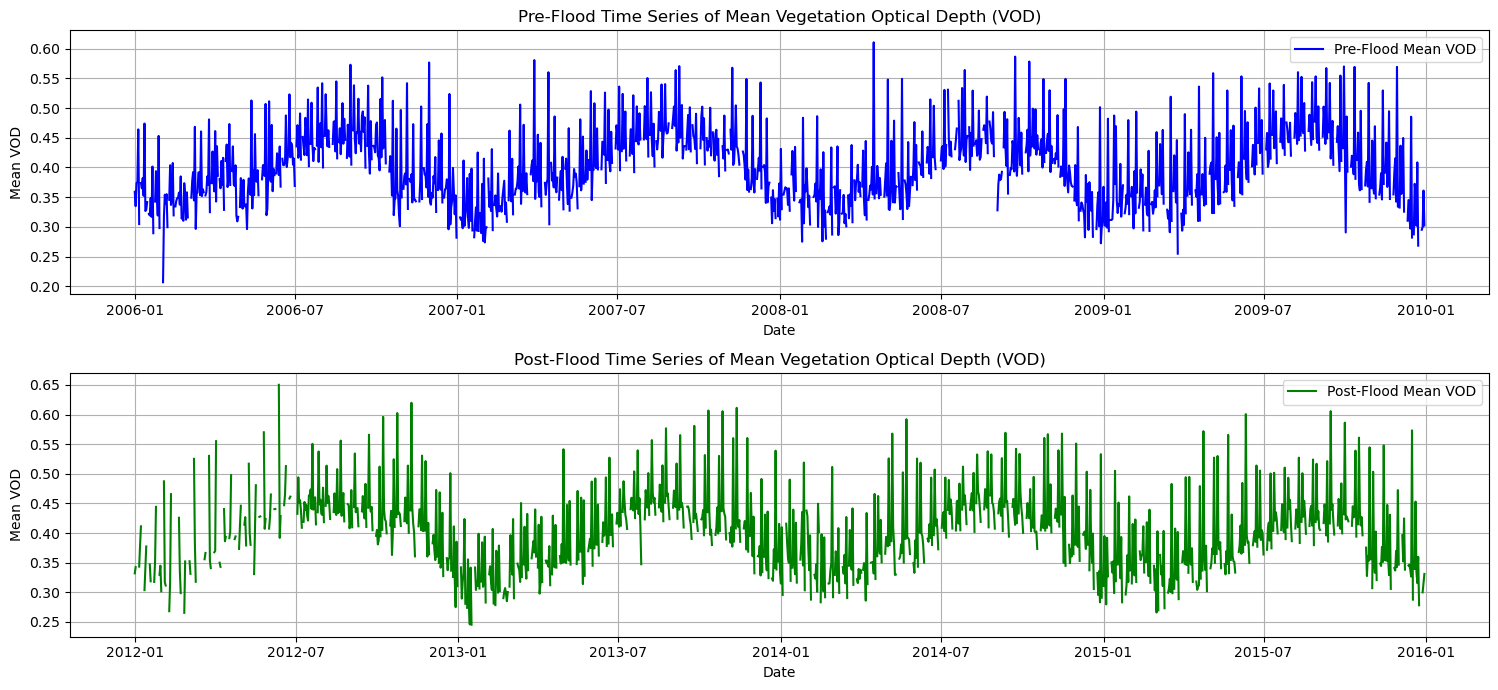

In [89]:
plt.figure(figsize = (15,7))
plt.subplot(2, 1, 1)  
plt.plot(preflood_raw.index, preflood_raw['meanVOD'], label='Pre-Flood Mean VOD', color='blue')
plt.xlabel('Date')
plt.ylabel('Mean VOD')
plt.title('Pre-Flood Time Series of Mean Vegetation Optical Depth (VOD)')
plt.legend()
plt.grid(True)

# Plotting post-flood data
plt.subplot(2, 1, 2) 
plt.plot(postflood_raw.index, postflood_raw['meanVOD'], label='Post-Flood Mean VOD', color='green')
plt.xlabel('Date')
plt.ylabel('Mean VOD')
plt.title('Post-Flood Time Series of Mean Vegetation Optical Depth (VOD)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [96]:
print(np.mean(preflood_raw['meanVOD']),np.mean(postflood_raw['meanVOD']))

0.4004236124041086 0.40020147800937467


In [97]:
preflood_time = VOD_RAW_timefill.loc[VOD_RAW_timefill['regionID']=='PreFlood']
preflood_time['regionID'].value_counts()
print(preflood_time.isnull().sum())

meanVOD     0
regionID    0
dtype: int64


In [98]:
postflood_time = VOD_RAW_timefill.loc[VOD_RAW_timefill['regionID']=='PostFlood']
postflood_time['regionID'].value_counts()
print(postflood_time.isnull().sum())

meanVOD     0
regionID    0
dtype: int64


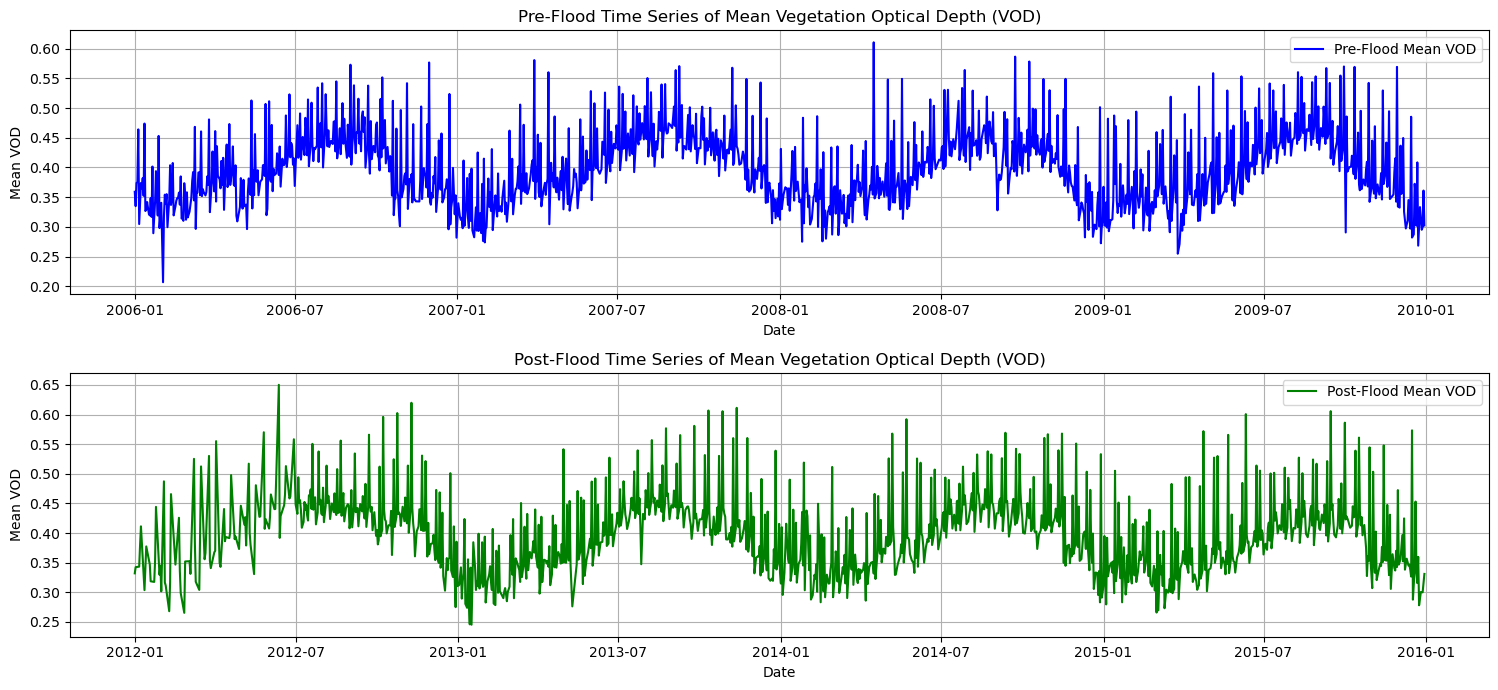

In [99]:
plt.figure(figsize = (15,7))
plt.subplot(2, 1, 1)  
plt.plot(preflood_time.index, preflood_time['meanVOD'], label='Pre-Flood Mean VOD', color='blue')
plt.xlabel('Date')
plt.ylabel('Mean VOD')
plt.title('Pre-Flood Time Series of Mean Vegetation Optical Depth (VOD)')
plt.legend()
plt.grid(True)

# Plotting post-flood data
plt.subplot(2, 1, 2) 
plt.plot(postflood_time.index, postflood_time['meanVOD'], label='Post-Flood Mean VOD', color='green')
plt.xlabel('Date')
plt.ylabel('Mean VOD')
plt.title('Post-Flood Time Series of Mean Vegetation Optical Depth (VOD)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [100]:
print(np.mean(preflood_time['meanVOD']),np.mean(postflood_time['meanVOD']))

0.39764497786686054 0.3958736465141192


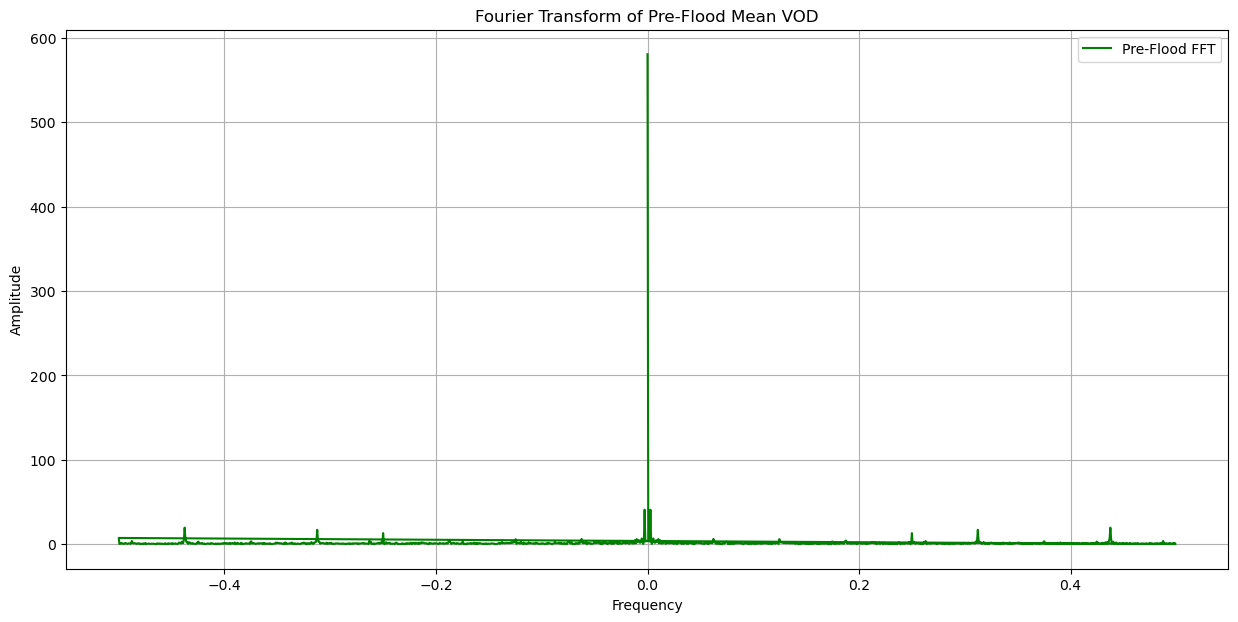

In [138]:

# Perform FFT on pre-flood data
fft_preflood = np.fft.fft(preflood_time['meanVOD'])
frequencies_preflood = np.fft.fftfreq(len(fft_preflood))

# Plotting the Fourier Transform results for pre-flood data
plt.figure(figsize=(15, 7))
plt.plot(frequencies_preflood, np.abs(fft_preflood), label='Pre-Flood FFT', color='green')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Pre-Flood Mean VOD')
plt.legend()
plt.grid(True)
plt.show()


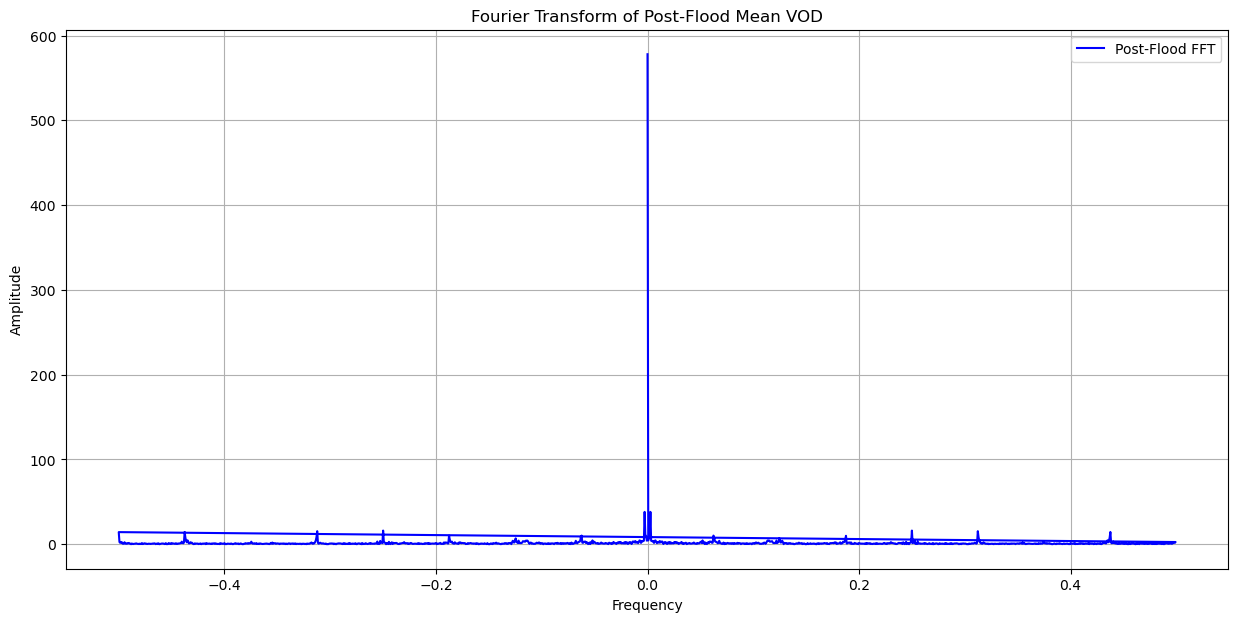

In [139]:
# Perform FFT on pre-flood data
fft_postflood = np.fft.fft(postflood_time['meanVOD'])
frequencies_postflood = np.fft.fftfreq(len(fft_postflood))

# Plotting the Fourier Transform results for pre-flood data
plt.figure(figsize=(15, 7))
plt.plot(frequencies_postflood, np.abs(fft_postflood), label='Post-Flood FFT', color='blue')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Post-Flood Mean VOD')
plt.legend()
plt.grid(True)
plt.show()


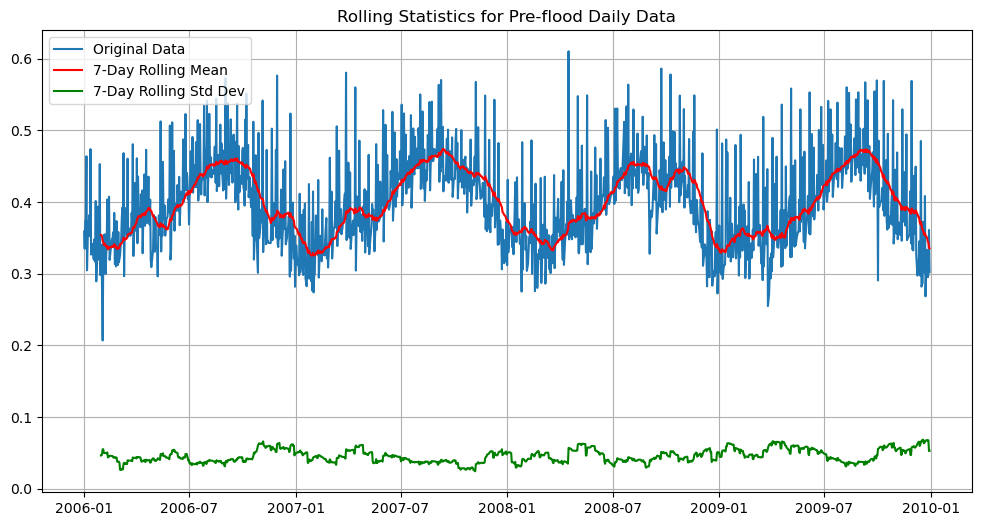

In [133]:
window_size = 30  # Weekly rolling window

# Calculate rolling mean and standard deviation
rolling_mean_pre = preflood_time['meanVOD'].rolling(window=window_size).mean()
rolling_std_pre = preflood_time['meanVOD'].rolling(window=window_size).std()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(preflood_time['meanVOD'], label='Original Data')
plt.plot(rolling_mean_pre, label='7-Day Rolling Mean', color='red')
plt.plot(rolling_std_pre, label='7-Day Rolling Std Dev', color='green')
plt.legend()
plt.title('Rolling Statistics for Pre-flood Daily Data')
plt.grid()
plt.show()

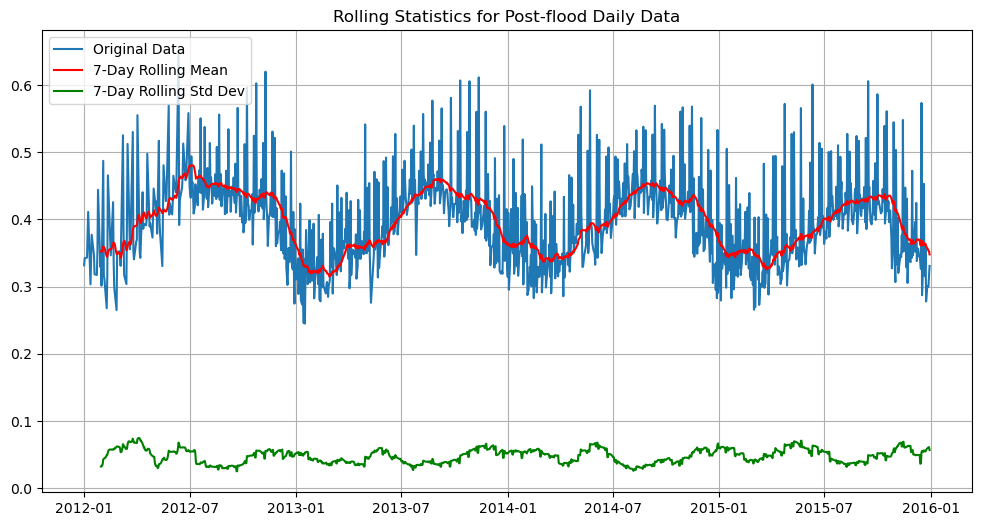

In [134]:
window_size = 30  # Weekly rolling window

# Calculate rolling mean and standard deviation
rolling_mean_post = postflood_time['meanVOD'].rolling(window=window_size).mean()
rolling_std_post = postflood_time['meanVOD'].rolling(window=window_size).std()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(postflood_time['meanVOD'], label='Original Data')
plt.plot(rolling_mean_post, label='7-Day Rolling Mean', color='red')
plt.plot(rolling_std_post, label='7-Day Rolling Std Dev', color='green')
plt.legend()
plt.title('Rolling Statistics for Post-flood Daily Data')
plt.grid()
plt.show()

In [118]:
# from scipy.signal import periodogram

/var/folders/55/xnl63bvd6sj0znwkf5h8ms2r0000gn/T/ipykernel_42611/1135944098.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preflood_time['meanVOD_detrended'] = result_pre.resid


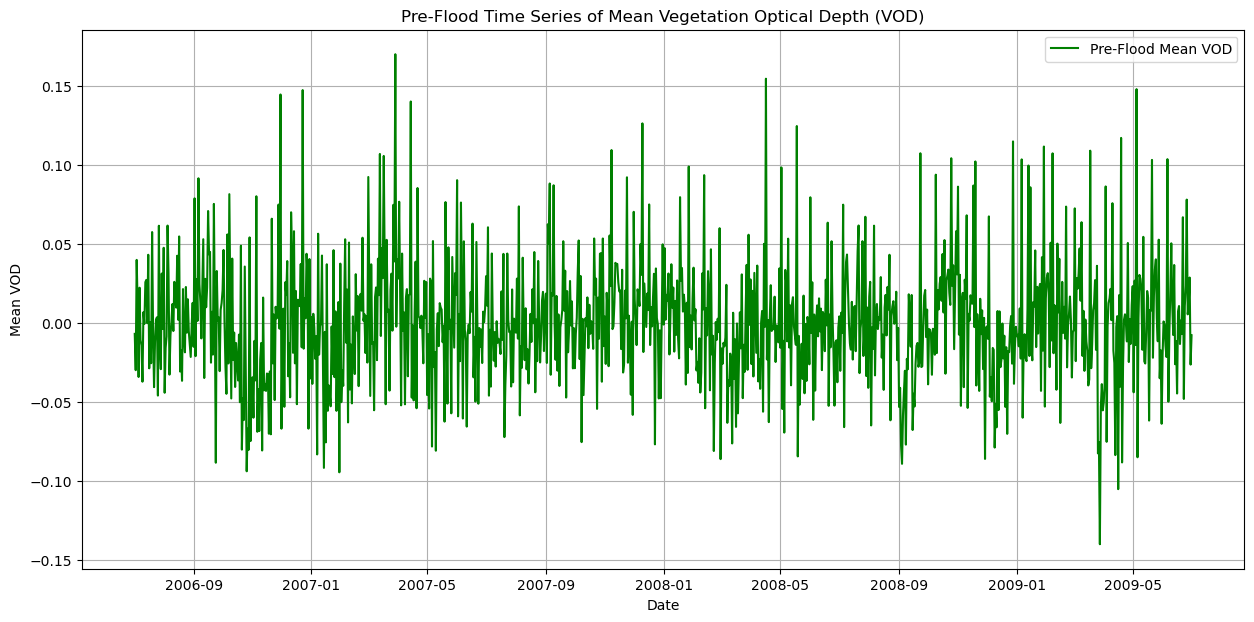

In [157]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition (the data is daily, and model = 'additive' or model = 'multiplicative',but it looks like the same)
result_pre_30 = seasonal_decompose(preflood_time['meanVOD'], model='additive', period=365)

# Detrend
preflood_time['meanVOD_detrended'] = result_pre.resid
plt.figure(figsize = (15,7))
plt.plot(preflood_time.index, preflood_time['meanVOD_detrended'], label='Pre-Flood Mean VOD', color='green')
plt.xlabel('Date')
plt.ylabel('Mean VOD')
plt.title('Pre-Flood Time Series of Mean Vegetation Optical Depth (VOD)')
plt.legend()
plt.grid(True)


plt.show()

/var/folders/55/xnl63bvd6sj0znwkf5h8ms2r0000gn/T/ipykernel_42611/293581718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postflood_time['meanVOD_detrended'] = result_post.resid


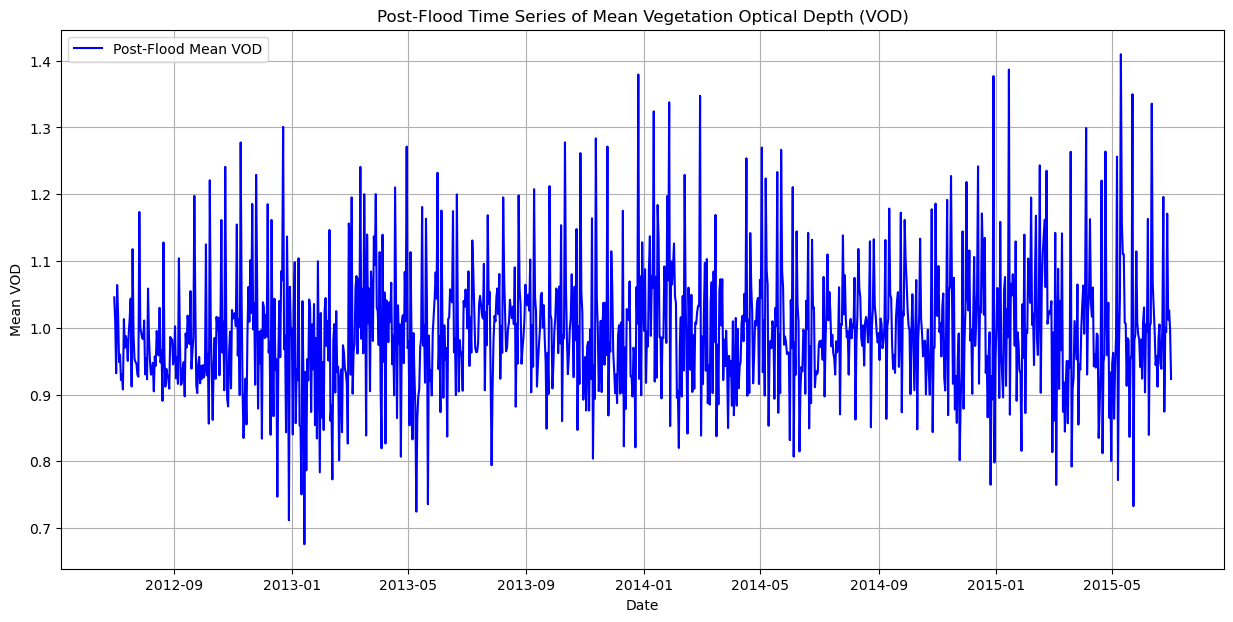

In [167]:


# Perform decomposition (the data is daily, and model = 'additive' or model = 'multiplicative')
result_post = seasonal_decompose(postflood_time['meanVOD'], model='multiplicative', period=365)

# Detrend
postflood_time['meanVOD_detrended'] = result_post.resid
plt.figure(figsize = (15,7))
plt.plot(postflood_time.index, postflood_time['meanVOD_detrended'], label='Post-Flood Mean VOD', color='blue')
plt.xlabel('Date')
plt.ylabel('Mean VOD')
plt.title('Post-Flood Time Series of Mean Vegetation Optical Depth (VOD)')
plt.legend()
plt.grid(True)


plt.show()

#### In seasonal decomposition, a time series is disaggregated into three components: trend, seasonal, and residual. The trend component is supposed to capture the slowly-moving overall level of the series. The seasonal component captures patterns that repeat every season. The residual is what is left, and can be thought of as just statistical noise. 
#### https://towardsdatascience.com/time-series-decomposition-8f39432f78f9#:~:text=Seasonality%20of%20Time%20Series%20Residual/Remainder:%20This%20is,is%20often%20grouped%20into%20the%20trend%20component.

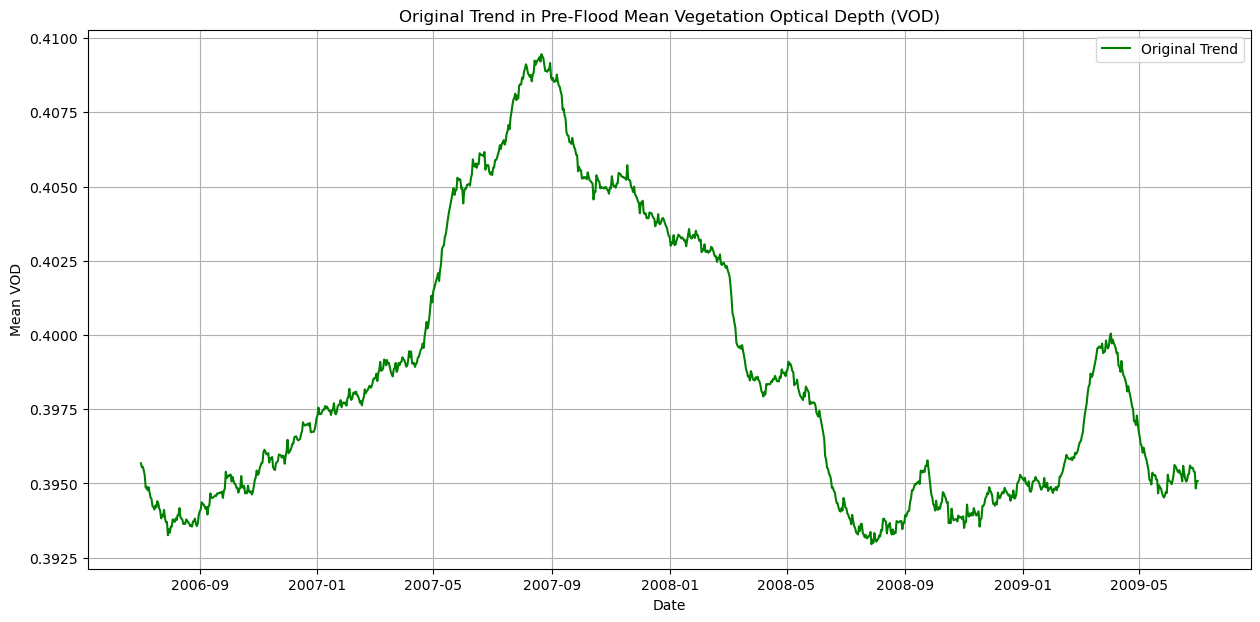

In [168]:
plt.figure(figsize=(15, 7))
plt.plot(preflood_time.index, result_pre.trend, label='Original Trend', color='green')
plt.xlabel('Date')
plt.ylabel('Mean VOD')
plt.title('Original Trend in Pre-Flood Mean Vegetation Optical Depth (VOD)')
plt.legend()
plt.grid(True)

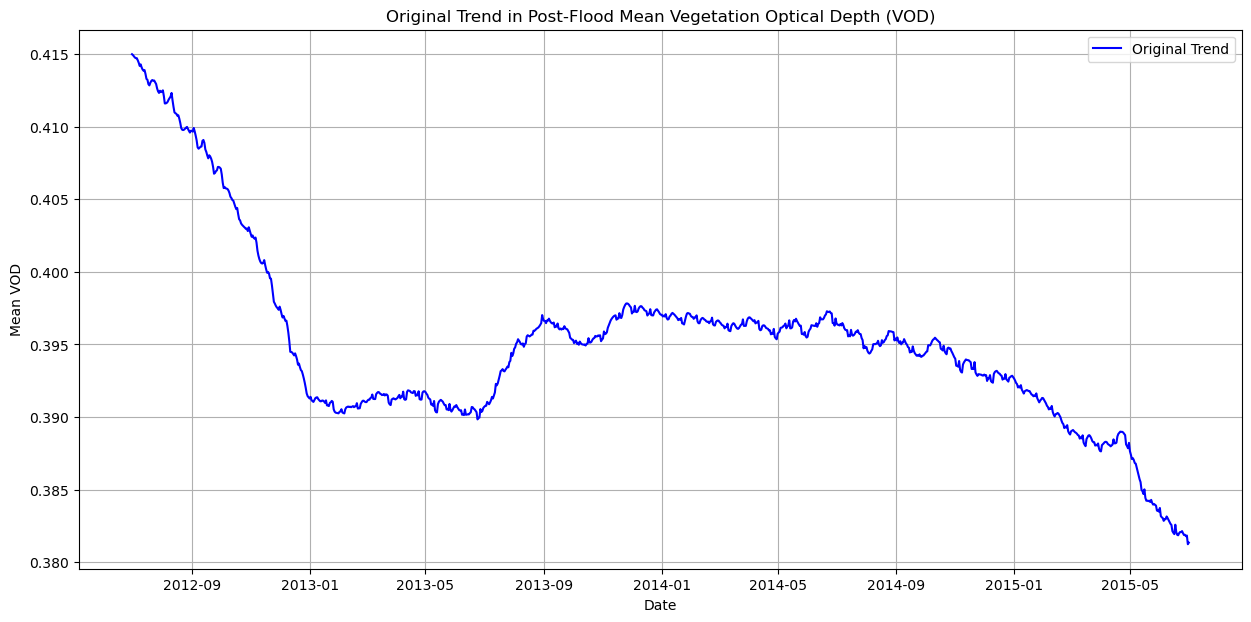

In [169]:
plt.figure(figsize=(15, 7))
plt.plot(postflood_time.index, result_post.trend, label='Original Trend', color='blue')
plt.xlabel('Date')
plt.ylabel('Mean VOD')
plt.title('Original Trend in Post-Flood Mean Vegetation Optical Depth (VOD)')
plt.legend()
plt.grid(True)


/var/folders/55/xnl63bvd6sj0znwkf5h8ms2r0000gn/T/ipykernel_42611/1519120439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preflood_time['meanVOD_detrended'] = result_pre.resid


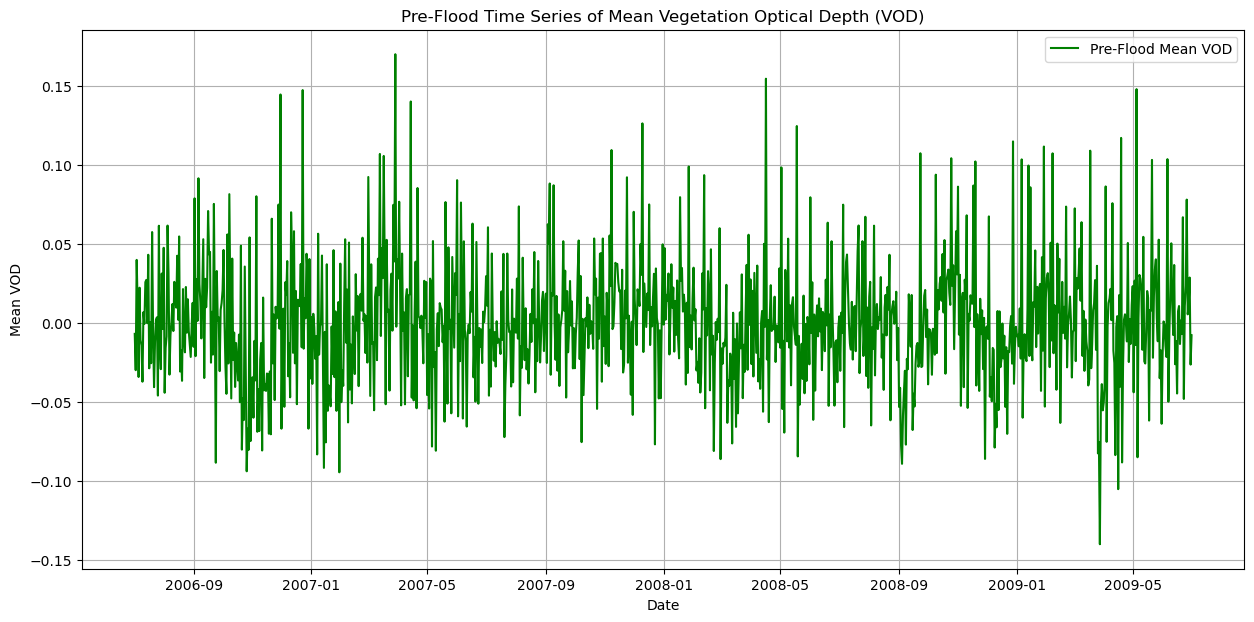

In [156]:
result_pre = seasonal_decompose(preflood_time['meanVOD'], model='addictive', period=365)

# Detrend
preflood_time['meanVOD_detrended'] = result_pre.resid
plt.figure(figsize = (15,7))
plt.plot(preflood_time.index, preflood_time['meanVOD_detrended'], label='Pre-Flood Mean VOD', color='green')
plt.xlabel('Date')
plt.ylabel('Mean VOD')
plt.title('Pre-Flood Time Series of Mean Vegetation Optical Depth (VOD)')
plt.legend()
plt.grid(True)


plt.show()

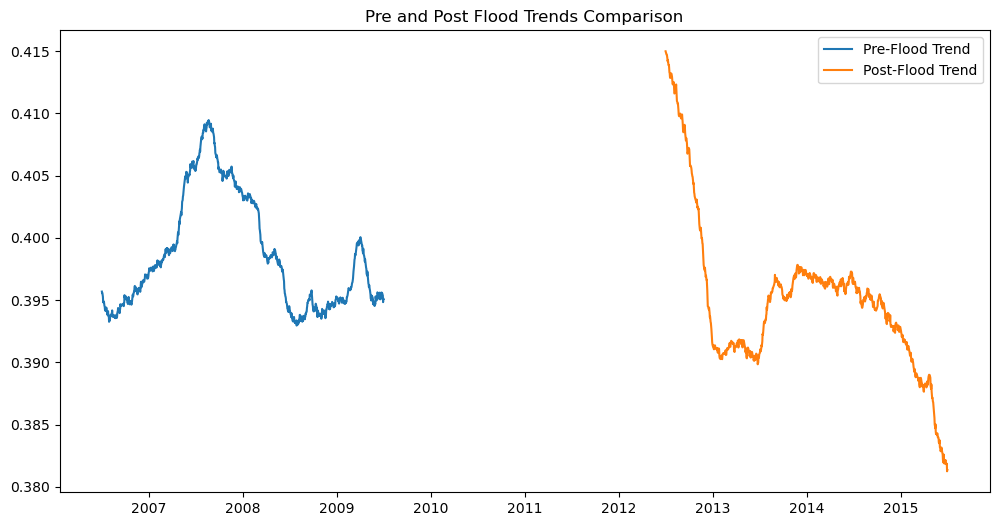

Pre-Flood Summary Statistics: count    1096.000000
mean        0.398654
std         0.004582
min         0.392951
25%         0.394810
50%         0.397549
75%         0.402847
max         0.409458
Name: trend, dtype: float64
Post-Flood Summary Statistics: count    1096.000000
mean        0.395103
std         0.006318
min         0.381245
25%         0.391187
50%         0.395056
75%         0.396678
max         0.414982
Name: trend, dtype: float64
Test Statistic: nan
P-Value: nan
No significant difference in the trends.


In [170]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'pre_flood_data' and 'post_flood_data' contain your trend data
pre_flood_data = result_pre.trend
post_flood_data = result_post.trend

# Visual Comparison
plt.figure(figsize=(12,6))
plt.plot(pre_flood_data, label='Pre-Flood Trend')
plt.plot(post_flood_data, label='Post-Flood Trend')
plt.title('Pre and Post Flood Trends Comparison')
plt.legend()
plt.show()

# Analytical Comparison
print("Pre-Flood Summary Statistics:", pre_flood_data.describe())
print("Post-Flood Summary Statistics:", post_flood_data.describe())

# Statistical Analysis
# Check for normality
if stats.shapiro(pre_flood_data).pvalue > 0.05 and stats.shapiro(post_flood_data).pvalue > 0.05:
    # Data is normally distributed
    t_stat, p_value = stats.ttest_ind(pre_flood_data, post_flood_data)
else:
    # Use non-parametric test
    t_stat, p_value = stats.mannwhitneyu(pre_flood_data, post_flood_data)

print("Test Statistic:", t_stat)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant difference in the trends.")
else:
    print("No significant difference in the trends.")


In [172]:
import numpy as np
from scipy import stats

# Replace NaN values with the mean or remove them
# pre_flood_data_clean = pre_flood_data.replace(np.nan, pre_flood_data.mean())
# post_flood_data_clean = post_flood_data.replace(np.nan, post_flood_data.mean())

# Alternatively, you can drop NaN values (if they are not significant in number)
pre_flood_data_clean = pre_flood_data.dropna()
post_flood_data_clean = post_flood_data.dropna()

# Perform the statistical test again
# Using t-test as an example (choose the test based on your data's characteristics)
t_stat, p_value = stats.ttest_ind(pre_flood_data_clean, post_flood_data_clean)

if not np.isnan(t_stat) and not np.isnan(p_value):
    print("Test Statistic:", t_stat)
    print("P-Value:", p_value)

    alpha = 0.05  # significance level
    if p_value < alpha:
        print("There is a significant difference in the trends.")
    else:
        print("No significant difference in the trends.")
else:
    print("Test still returns NaN. Further investigation needed.")


Test Statistic: 15.060347604915545
P-Value: 7.559967428632497e-49
There is a significant difference in the trends.


In [183]:
import scipy.stats as stats

# Homogeneity of variance test
stat, p_val = stats.levene(pre_flood_data_clean, post_flood_data_clean)
print("Levene's Test P-Value:", p_val)

# Normality tests
stat, p_val_pre = stats.shapiro(pre_flood_data)
print("Shapiro-Wilk Test for Pre-Flood Data P-Value:", p_val_pre)

stat, p_val_post = stats.shapiro(post_flood_data)
print("Shapiro-Wilk Test for Post-Flood Data P-Value:", p_val_post)


Levene's Test P-Value: 0.0002586665892317038
Shapiro-Wilk Test for Pre-Flood Data P-Value: 1.0
Shapiro-Wilk Test for Post-Flood Data P-Value: 1.0


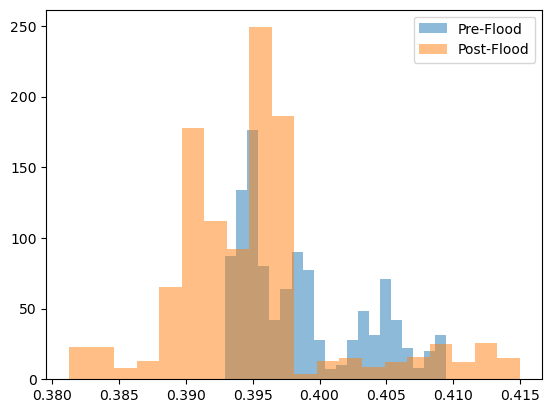

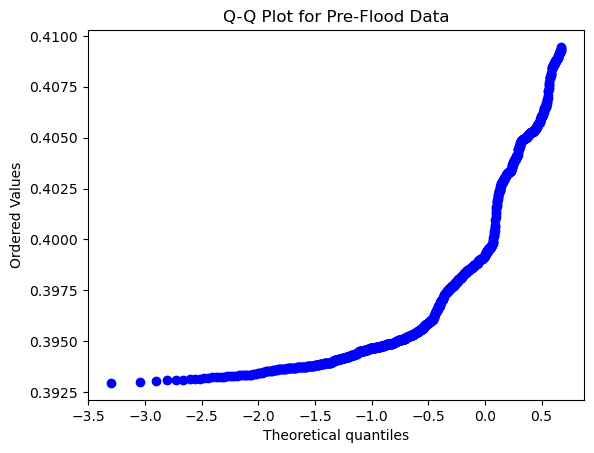

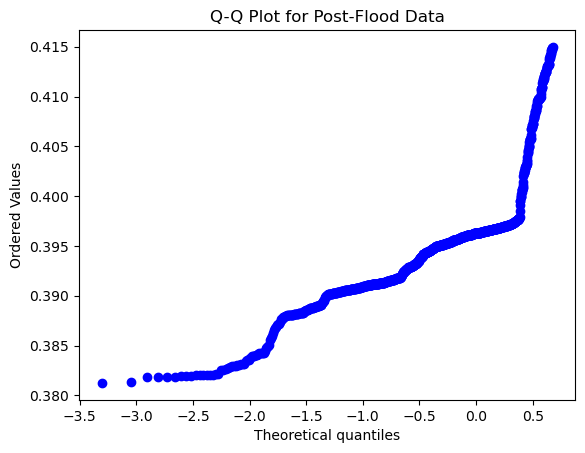

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histograms
plt.hist(pre_flood_data_clean, bins=20, alpha=0.5, label='Pre-Flood')
plt.hist(post_flood_data_clean, bins=20, alpha=0.5, label='Post-Flood')
plt.legend()
plt.show()

# Q-Q Plots
stats.probplot(pre_flood_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Pre-Flood Data")
plt.show()

stats.probplot(post_flood_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Post-Flood Data")
plt.show()


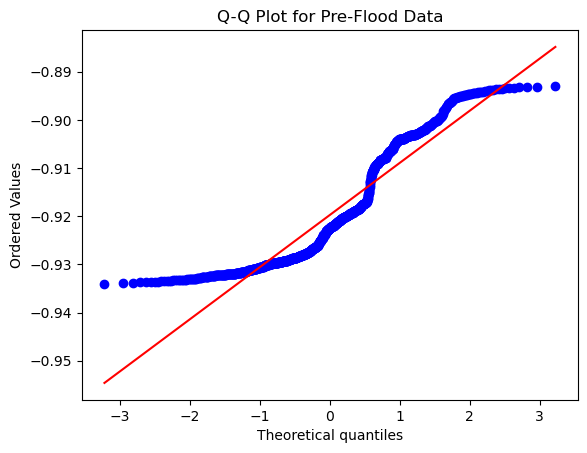

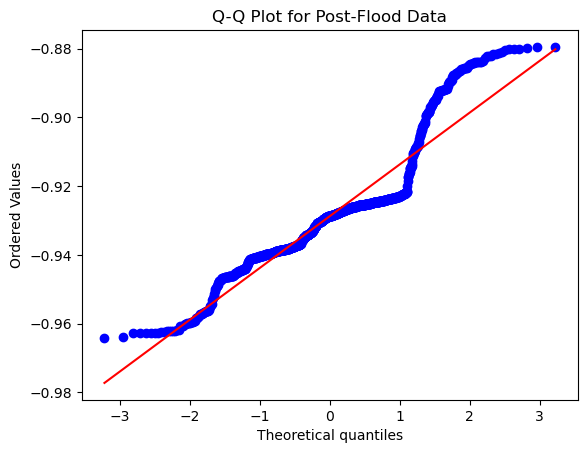

In [187]:
# log transformation
pre_flood_data_log = np.log(pre_flood_data_clean)
post_flood_data_log = np.log(post_flood_data_clean)
# Q-Q Plots
stats.probplot(pre_flood_data_log, dist="norm", plot=plt)
plt.title("Q-Q Plot for Pre-Flood Data")
plt.show()

stats.probplot(post_flood_data_log, dist="norm", plot=plt)
plt.title("Q-Q Plot for Post-Flood Data")
plt.show()



In [188]:
# You can only use the Wilcoxon test if the data pairs are matched (i.e., the same size and paired by a particular feature)
# This is just a placeholder; replace it with your actual paired data if available
paired_pre_flood_data = pre_flood_data_clean
paired_post_flood_data = post_flood_data_clean

# Ensure both samples have the same size
if len(paired_pre_flood_data) == len(paired_post_flood_data):
    w_statistic, p_value = stats.wilcoxon(paired_pre_flood_data, paired_post_flood_data)
    print('Wilcoxon Signed-Rank Test Statistic:', w_statistic)
    print('P-Value:', p_value)
else:
    print("The data is not paired or has different sizes.")


Wilcoxon Signed-Rank Test Statistic: 147422.0
P-Value: 2.35261538219623e-48


In [189]:
from scipy import stats

# Assuming pre_flood_data and post_flood_data are your Pandas Series with the trend data
u_statistic, p_value = stats.mannwhitneyu(pre_flood_data_clean, post_flood_data_clean, alternative='two-sided')

print('Mann-Whitney U Test Statistic:', u_statistic)
print('P-Value:', p_value)


Mann-Whitney U Test Statistic: 844308.0
P-Value: 8.655945709617433e-61
